In [215]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [216]:
df=pd.read_csv("./Audi_A1_listings.csv")
df.head()

,index,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),href,PPY,MileageRank,PriceRank,PPYRank,Score
0,0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,https://www.autotrader.co.uk/car-details/20221...,2499.166667,215,163,340,718
1,4,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,https://www.autotrader.co.uk/car-details/20221...,2688.750000,222,330,276,828
2,7,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,https://www.autotrader.co.uk/car-details/20221...,3599.666667,221,327,94,642
3,11,2014.0,Hatchback,86000.0,1.6L,103.550296,Manual,Diesel,3,7490.0,https://www.autotrader.co.uk/car-details/20221...,3745.000000,41,449,83,573
4,12,2014.0,Hatchback,104310.0,1.6L,103.550296,Manual,Diesel,3,7400.0,https://www.autotrader.co.uk/car-details/20220...,3700.000000,12,452,85,549


<Axes: xlabel='Transmission', ylabel='count'>

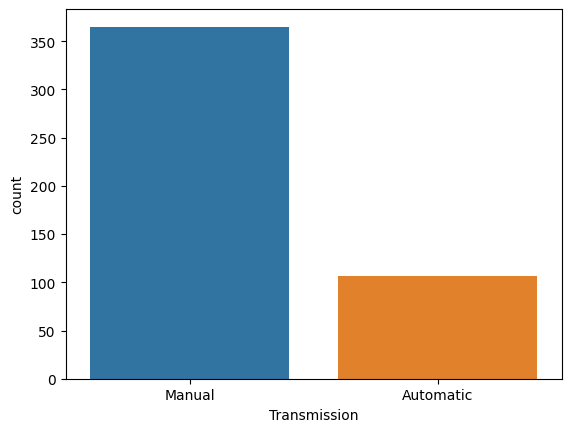

In [217]:
sns.countplot(x="Transmission",data=df)
#Number of manual cars are greater than automatic ones.

<Axes: xlabel='Fuel', ylabel='count'>

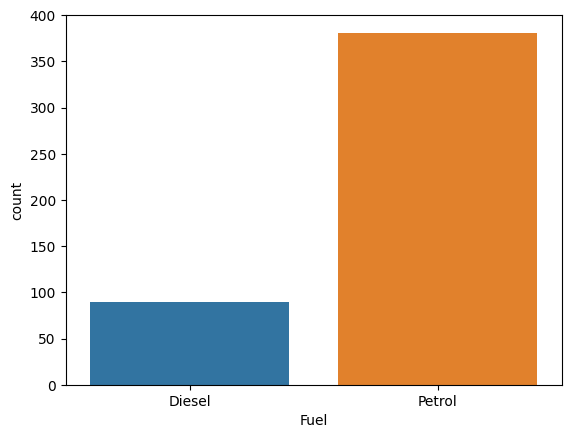

In [218]:
sns.countplot(x='Fuel', data=df)
#Number of Diesel cars are less than cars with petrols.

<Axes: xlabel='Year', ylabel='Price(£)'>

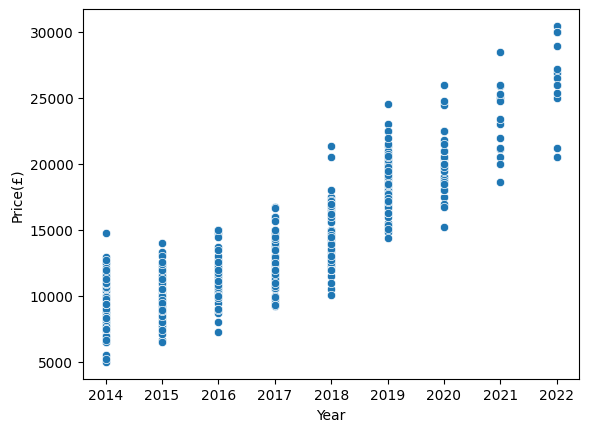

In [219]:
sns.scatterplot(x='Year', y='Price(£)', data=df)
# we can analyse that prices are increasing while year increase.

<Axes: xlabel='Year', ylabel='Mileage(miles)'>

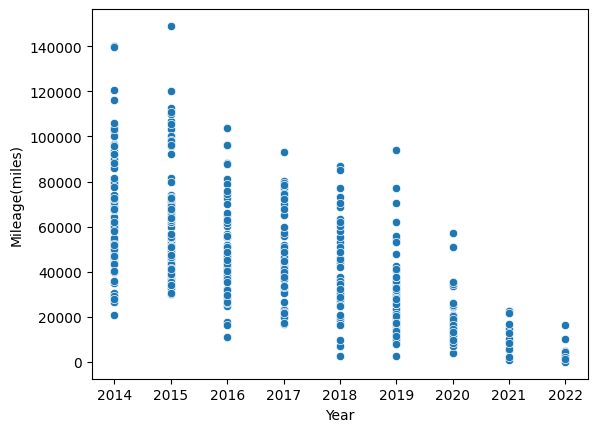

In [220]:
sns.scatterplot(x='Year', y='Mileage(miles)', data=df)
#Miles are decreasing while year increasing

<Axes: xlabel='Number_of_Owners', ylabel='Price(£)'>

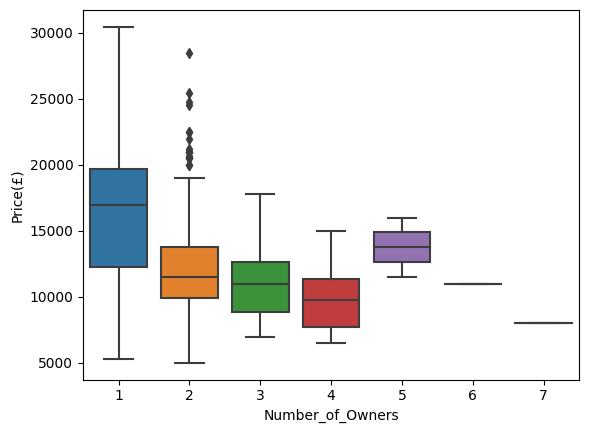

In [221]:
sns.boxplot(x='Number_of_Owners', y='Price(£)', data=df)

In [223]:
#y=ax+b
columns_to_drop = ["index", "href", "MileageRank", "PriceRank", "PPYRank", "Score"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df.head()


,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY
0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,3599.666667
3,2014.0,Hatchback,86000.0,1.6L,103.550296,Manual,Diesel,3,7490.0,3745.000000
4,2014.0,Hatchback,104310.0,1.6L,103.550296,Manual,Diesel,3,7400.0,3700.000000


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Type              471 non-null    object 
 2   Mileage(miles)    471 non-null    float64
 3   Engine            471 non-null    object 
 4   PS                471 non-null    float64
 5   Transmission      471 non-null    object 
 6   Fuel              471 non-null    object 
 7   Number_of_Owners  471 non-null    int64  
 8   Price(£)          471 non-null    float64
 9   PPY               471 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 36.9+ KB


In [225]:
df["Engine"]=df["Engine"].str.replace("L","")
df["Engine"]=pd.to_numeric(df["Engine"])

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Type              471 non-null    object 
 2   Mileage(miles)    471 non-null    float64
 3   Engine            471 non-null    float64
 4   PS                471 non-null    float64
 5   Transmission      471 non-null    object 
 6   Fuel              471 non-null    object 
 7   Number_of_Owners  471 non-null    int64  
 8   Price(£)          471 non-null    float64
 9   PPY               471 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 36.9+ KB


In [227]:
df.head()

,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY
0,2018.0,Hatchback,44000.0,1.6,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,Hatchback,42596.0,1.0,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,Hatchback,42700.0,1.4,123.274162,Manual,Petrol,2,10799.0,3599.666667
3,2014.0,Hatchback,86000.0,1.6,103.550296,Manual,Diesel,3,7490.0,3745.000000
4,2014.0,Hatchback,104310.0,1.6,103.550296,Manual,Diesel,3,7400.0,3700.000000


In [228]:
df=pd.get_dummies(df,columns=["Type","Transmission","Fuel"],drop_first=True,dtype=int)

In [229]:
x=df.drop(columns=["Price(£)"])
y=df[["Price(£)"]]

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=22)

In [231]:
linear_model=LinearRegression()
model=linear_model.fit(x_train,y_train)

In [232]:
x

,Year,Mileage(miles),Engine,PS,Number_of_Owners,PPY,Transmission_Manual,Fuel_Petrol
0,2018.0,44000.0,1.6,114.398422,1,2499.166667,1,0
1,2016.0,42596.0,1.0,93.688363,3,2688.750000,1,1
2,2015.0,42700.0,1.4,123.274162,2,3599.666667,1,1
3,2014.0,86000.0,1.6,103.550296,3,3745.000000,1,0
4,2014.0,104310.0,1.6,103.550296,3,3700.000000,1,0
...,...,...,...,...,...,...,...,...
466,2014.0,40195.0,1.4,138.067061,3,5637.500000,0,1
467,2020.0,26218.0,1.0,114.398422,1,2311.875000,1,1
468,2017.0,48571.0,1.4,123.274162,2,2399.000000,1,1
469,2020.0,9584.0,1.0,93.688363,1,2496.250000,1,1


In [233]:
model.predict([[2023,32000,1.4,116,1,3600,1,1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[28181.68855691]])

In [234]:
model.score(x_test,y_test)

0.9563152741632539